# Handwritten digits recognition

## Imports

In [1]:
import gzip

import keras as kr
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils

import numpy as np

import matplotlib
from matplotlib import pyplot as plt

Using TensorFlow backend.
/home/bernard/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/bernard/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/bernard/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/bernard/anaconda3/lib/python3.7/site-packages/t

## Global variables

In [2]:
epoch = 12
num_classes = 10

# Datasets
test_images_file = "datasets/t10k-images-idx3-ubyte.gz"
test_labels_file = "datasets/t10k-labels-idx1-ubyte.gz"
train_images_file = "datasets/train-images-idx3-ubyte.gz"
train_labels_file = "datasets/train-labels-idx1-ubyte.gz"

## Reading Files

In [3]:
# 10k images
with gzip.open(test_images_file, 'rb') as f:
    test_images = f.read()

# 10k labels
with gzip.open(test_labels_file, 'rb') as f:
    test_labels = f.read()    

# 60k images
with gzip.open(train_images_file, 'rb') as f:
    train_images = f.read()

# 60k labels    
with gzip.open(train_labels_file, 'rb') as f:
    train_labels = f.read()

## Reshape data

In [4]:
# Skip 16 bytes for images file
test_img = ~np.array(list(test_images[16:])).reshape(10000, 28, 28).astype(np.uint8)
train_img = ~np.array(list(train_images[16:])).reshape(60000, 28, 28).astype(np.uint8)
test_img = test_img.reshape(10000, 784)
train_img = train_img.reshape(60000, 784)

# Skip 8 bytes for labels file
test_lbl = np.array(list(test_labels[ 8:])).astype(np.uint8)
train_lbl = np.array(list(train_labels[ 8:])).astype(np.uint8)

In [5]:
# Normalize inputs from 0-255 to 0-1
test_img = test_img / 255
train_img = train_img / 255

## Inspect data

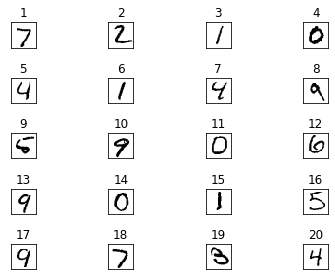

In [6]:
# Image data
for i in range(20):
    plt.subplot(5, 4, i + 1)
    plt.title(i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()
    plt.imshow(test_img[i].reshape(28,28), cmap='gray')

In [7]:
# Label data
for i in range(20):
    print(test_lbl[i], end=" ")

7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 

## Convert class vectors to binary class matrices

In [8]:
# one hot encode outputs
test_lbl = np_utils.to_categorical(test_lbl, num_classes)
train_lbl = np_utils.to_categorical(train_lbl, num_classes)

In [9]:
# Inspect matrices
for i in range(10):
    print(test_lbl[i])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
